In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\repos\\mlops-regression-mlflow\\data\\raw\\untouched_raw_ori_house.csv")

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [5]:
df.shape

(884092, 39)

In [6]:
df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,0.946642,0.090909,0.034483,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta


In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dt.year.value_counts())

date
2013    74712
2014    74712
2015    74712
2016    74712
2017    74712
2018    74712
2019    74712
2020    74712
2021    74712
2022    74712
2023    74712
2012    62260
Name: count, dtype: int64


##### Avoid Leakage

- Your train set (2012–2019) is “clean” historical training.

- Your eval set (2020–2021) is “unseen” during training, but still used for validation and hyperparameter tuning.

- Your holdout set (2022–2023) is completely untouched until the very end.

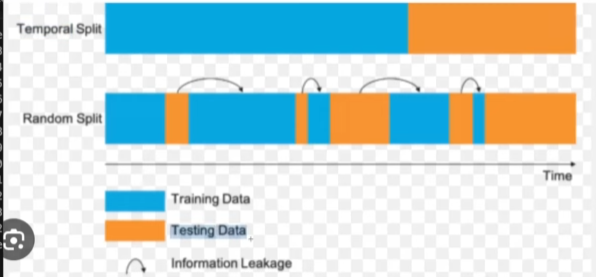

- In this notebook, we will split the data into train, eval, and holdout sets.
- we do not do train test split randomly using scikitlearn because this is a time series data set.
- random splitting includes training data from all times which lead to data leakage when we want to predict on unseen data 

In [8]:
# Sort by date (important to avoid shuffling issues)
df = df.sort_values("date")

In [9]:
# Define cutoff dates
cutoff_date_eval = "2020-01-01"   # validation starts
cutoff_date_holdout = "2022-01-01"  # holdout starts

In [10]:
# Train: before 2020
train_df = df[df["date"] < cutoff_date_eval]

# Validation/Eval: 2020–2021
eval_df = df[(df["date"] >= cutoff_date_eval) & (df["date"] < cutoff_date_holdout)]

# Holdout: 2022–2023
holdout_df = df[df["date"] >= cutoff_date_holdout]

print("Train shape:", train_df.shape)
print("Eval shape:", eval_df.shape)
print("Holdout shape:", holdout_df.shape)

Train shape: (585244, 39)
Eval shape: (149424, 39)
Holdout shape: (149424, 39)


In [11]:
train_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
640562,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh


In [12]:
eval_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
137976,2020-01-31,184000.0,168450.0,123.333333,109.899800,35.0,30.0,34.0,37.0,50.0,0.954732,0.171429,0.300000,CHI,60482,2020,3.0,0.0,2.0,0.0,68.0,30.0,60.0,5.0,14.0,10849.0,42.1,27037.0,10795.0,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,164839.734849,Chicago-Naperville-Elgin
157714,2020-01-31,140000.0,139000.0,94.691957,111.311054,61.0,81.0,83.0,54.0,10.0,0.963039,0.098361,0.469136,CIN,41071,2020,35.0,5.0,4.0,3.0,139.0,259.0,86.0,1.0,8.0,20624.0,36.6,30324.0,19423.0,10164.0,802.0,132400.0,10479.0,552.0,19809.0,19809.0,9383.0,132164.314962,Cincinnati


In [13]:
holdout_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
587856,2022-01-31,340000.0,349999.0,189.867865,195.526649,282.0,287.0,241.0,73.0,12.0,0.991177,0.308511,0.634146,ORL,32771,2022,9.0,0.0,1.0,1.0,56.0,64.0,18.0,4.0,9.0,57074.0,37.7,33896.0,56681.0,22246.0,1289.0,261800.0,29485.0,1469.0,55621.0,55621.0,24381.0,314667.746005,Orlando-Kissimmee-Sanford
878956,2022-01-31,310000.0,269900.0,243.839836,239.543726,49.0,47.0,43.0,7.0,6.5,1.006586,0.489796,0.723404,TPA,33778,2022,21.0,0.0,3.0,2.0,35.0,57.0,32.0,0.0,22.0,15912.0,47.8,31277.0,15405.0,7865.0,1161.0,206600.0,7846.0,345.0,15423.0,15423.0,6733.0,325271.243813,Tampa-St. Petersburg-Clearwater


In [14]:
# Save splits
train_df.to_csv("C:\\Users\\HP\\Documents\\repos\\mlops-regression-mlflow\\data\\raw\\train.csv", index=False)
eval_df.to_csv("C:\\Users\\HP\\Documents\\repos\\mlops-regression-mlflow\\data\\raw\\eval.csv", index=False)
holdout_df.to_csv("C:\\Users\\HP\\Documents\\repos\\mlops-regression-mlflow\\data\\raw\\holdout.csv", index=False)